## Wrangle file for Zillow's 2017 Property Information

In [5]:
import wrangle as wr

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
zillow = wr.get_zillow_data()
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [3]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [4]:
zillow.shape

(2152863, 7)

In [14]:
zillow.value_counts().sum()

2140235

In [6]:
zillow.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152852.0,3.287196,0.954754,0.00,3.00,3.00,4.00,25.00
bathroomcnt,2152852.0,2.230688,0.999280,0.00,2.00,2.00,3.00,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.00,1623.00,2208.00,952576.00
taxvaluedollarcnt,2152370.0,461896.237963,699676.049600,1.00,188170.25,327671.00,534527.00,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.00,1958.00,1976.00,2016.00
taxamount,2148421.0,5634.865978,8178.910249,1.85,2534.98,4108.95,6414.32,1337755.86
fips,2152863.0,6048.377335,20.433292,6037.00,6037.00,6037.00,6059.00,6111.00


#### Acquire and Summarize Takeaways
- Over 2M rows
- All data types are float but most should be int
- Many nulls

In [9]:
zillow.isnull().any()

bedroomcnt                       True
bathroomcnt                      True
calculatedfinishedsquarefeet     True
taxvaluedollarcnt                True
yearbuilt                        True
taxamount                        True
fips                            False
dtype: bool

In [10]:
zillow.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [12]:
zillow.columns[zillow.isnull().any()]

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount'],
      dtype='object')

In [ ]:
zillow.bedroomcnt.value_counts(dropna=False, ascending=True)

In [ ]:
zillow.bathroomcnt.value_counts(dropna=False, ascending=True)

In [17]:
# Dropping the null values
zillow = zillow.dropna()
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.6 MB


In [18]:
zillow.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

In [19]:
zillow.shape

(2140235, 7)

In [20]:
# Change bedroom count, year built, calculated finished squarefeet, and fips value type to int
zillow.bedroomcnt = zillow.bedroomcnt.astype('int64')
zillow.calculatedfinishedsquarefeet = zillow.calculatedfinishedsquarefeet.astype('int64')
zillow.yearbuilt = zillow.yearbuilt.astype('int64')
zillow.fips = zillow.fips.astype('int64')

zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  int64  
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          int64  
dtypes: float64(3), int64(4)
memory usage: 130.6 MB


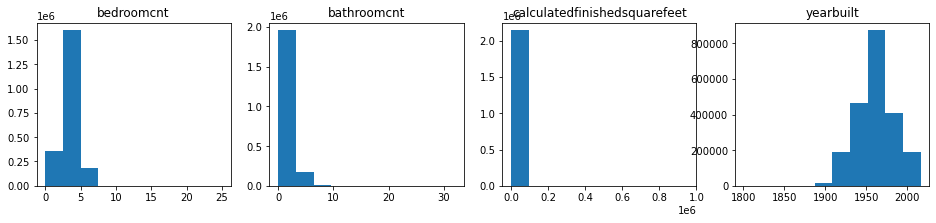

In [30]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow[col].hist(bins=10)

    # Hide gridlines.
    plt.grid(False)

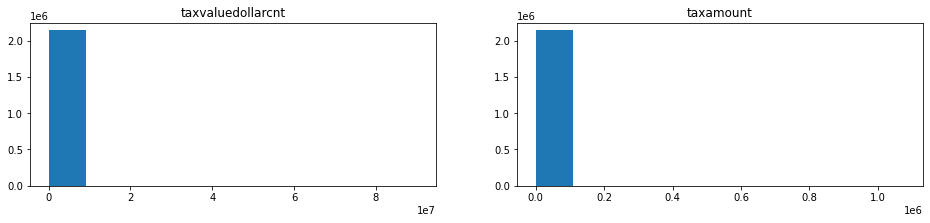

In [29]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['taxvaluedollarcnt', 'taxamount']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,2, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    zillow[col].hist(bins=10)

    # Hide gridlines.
    plt.grid(False)

In [28]:
zillow.calculatedfinishedsquarefeet.head(10)

4     3633
6     1620
7     2077
11    1200
14     171
15     203
18    1244
19    1300
20    1222
21    4144
Name: calculatedfinishedsquarefeet, dtype: int64

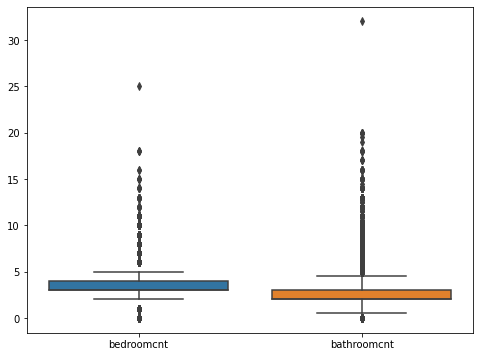

In [37]:
plt.figure(figsize=(8,6))

sns.boxplot(data=zillow.drop(columns=['fips', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount', 'yearbuilt']))
plt.show()

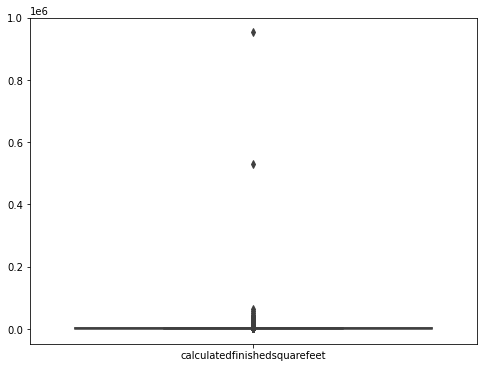

In [48]:
plt.figure(figsize=(8,6))

sns.boxplot(data=zillow.drop(columns=['fips', 'taxvaluedollarcnt', 'taxamount', 'yearbuilt', 'bedroomcnt', 'bathroomcnt']))
plt.show()

In [52]:
zillow[zillow == " "].value_counts().sum()

0